### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Load the dataset


In [2]:
df = pd.read_excel('hotel_reviews (2) (1).xlsx')
df.head(20)

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
5,love monaco staff husband stayed hotel crazy w...,5,NaN
6,"cozy stay rainy city, husband spent 7 nights m...",5,NaN
7,"excellent staff, housekeeping quality hotel ch...",4,NaN
8,"hotel stayed hotel monaco cruise, rooms genero...",5,NaN
9,excellent stayed hotel monaco past w/e delight...,5,NaN


## EDA

#### chek the shape of the dataset


In [3]:
df.shape

(20491, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  int64  
 2   @       0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.4+ KB


#### Chek null vlues

In [5]:
df.isnull().sum()

Review        0
Rating        0
@         20491
dtype: int64

#### chek douplicates 

In [6]:
df.duplicated()
df.duplicated().sum()

0

#### Drop empty column

In [7]:
df = df.drop(columns=['@'])

In [8]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


####  Detect and Remove Outliers in Review Length

<Axes: >

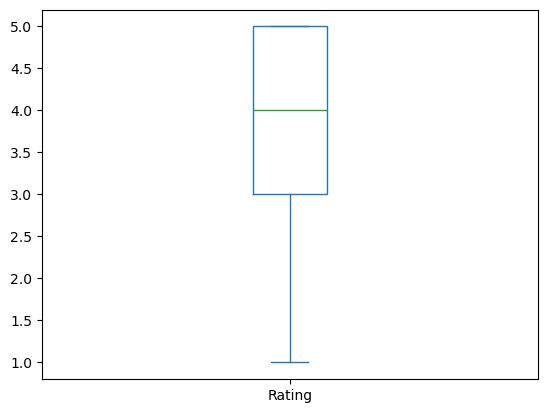

In [9]:
df.plot(kind = 'box')

In [10]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [11]:
print("Rating Summary:")
print(df["Rating"].describe())

Rating Summary:
count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


#### Countplot of Ratings

C:\Users\Asus\AppData\Local\Temp\ipykernel_7692\141416563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Rating"], palette="viridis")


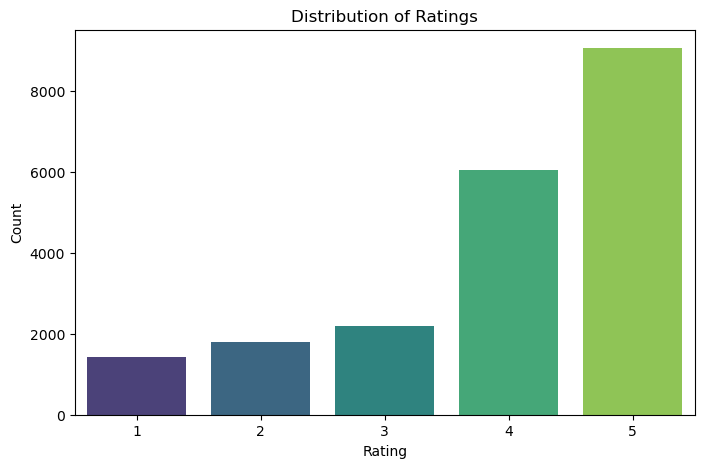

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Rating"], palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Lower casting


In [13]:
df['Review'] = df['Review'].astype(str).str.lower()

### Tokenization

In [14]:
import nltk

In [15]:
from nltk.tokenize import word_tokenize
df['Review'] = df['Review'].apply(word_tokenize)

In [16]:
df.head(10)

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, rooms, not, 4, *, experience, hotel, mo...",3
3,"[unique, ,, great, stay, ,, wonderful, time, h...",5
4,"[great, stay, great, stay, ,, went, seahawk, g...",5
5,"[love, monaco, staff, husband, stayed, hotel, ...",5
6,"[cozy, stay, rainy, city, ,, husband, spent, 7...",5
7,"[excellent, staff, ,, housekeeping, quality, h...",4
8,"[hotel, stayed, hotel, monaco, cruise, ,, room...",5
9,"[excellent, stayed, hotel, monaco, past, w/e, ...",5


#### stop_words remove

In [17]:
from nltk.corpus import stopwords
text_column = "Review" 

In [18]:
# Define stop words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [19]:
# Function to remove stop words
def remove_stop_words(text):
    words = word_tokenize(str(text))  # Tokenize text
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply function to text column
df[text_column] = df[text_column].apply(remove_stop_words)


In [20]:
df.head()

,Review,Rating
0,"[ 'nice ' , 'hotel ' , 'expensive ' , 'parking...",4
1,"[ 'ok ' , 'nothing ' , 'special ' , 'charge ' ...",2
2,"[ 'nice ' , 'rooms ' , 'not ' , ' 4 ' , ' * ' ...",3
3,"[ 'unique ' , ' , ' , 'great ' , 'stay ' , ' ,...",5
4,"[ 'great ' , 'stay ' , 'great ' , 'stay ' , ' ...",5


#### Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization correctly
df['Review'] = df['Review'].astype(str).apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


In [22]:
df.head()

,Review,Rating
0,"[ 'nice ' , 'hotel ' , 'expensive ' , 'parking...",4
1,"[ 'ok ' , 'nothing ' , 'special ' , 'charge ' ...",2
2,"[ 'nice ' , 'rooms ' , 'not ' , ' 4 ' , ' * ' ...",3
3,"[ 'unique ' , ' , ' , 'great ' , 'stay ' , ' ,...",5
4,"[ 'great ' , 'stay ' , 'great ' , 'stay ' , ' ...",5


### Remove Punctuation

In [23]:
import string
exclude = string.punctuation

def remove_puntution(text):
    return text.translate(str.maketrans('','',exclude))

df['Review'].apply(remove_puntution)

0         nice   hotel   expensive   parking   got   go...
1         ok   nothing   special   charge   diamond   m...
2         nice   rooms   not    4       experience   ho...
3         unique       great   stay       wonderful   t...
4         great   stay   great   stay       went   seah...
                               ...                        
20486     best   kept   secret   3rd   time   staying  ...
20487     great   location   price   view   hotel   gre...
20488     ok   just   looks   nice   modern   outside  ...
20489     hotel   theft   ruined   vacation   hotel   o...
20490     people   talking       ca    nt   believe   e...
Name: Review, Length: 20491, dtype: object

### Sentiment analysis

####  Calculate key metrics

In [24]:
avg_Rating = df['Rating'].mean()
positive_Rating = len(df[df['Rating'] >= 4]) / len(df) * 100
neutral_Rating= len(df[(df['Rating'] > 2) & (df['Rating'] < 4)]) / len(df) * 100
negative_Rating = len(df[df['Rating'] <= 2]) / len(df) * 100


print("\nKey Insights:")
print(f"1. Average Rating: {avg_Rating:.2f}/5")
print(f"2. Positive Rating (4-5 stars): {positive_Rating:.1f}%")
print(f"3. neutral_Rating (Rating>2 & Rating< 4 ): {neutral_Rating :.1f}%")
print(f"4. Negative_Rating (1-2 stars): {negative_Rating:.1f}%")



Key Insights:
1. Average Rating: 3.95/5
2. Positive Rating (4-5 stars): 73.7%
3. neutral_Rating (Rating>2 & Rating< 4 ): 10.7%
4. Negative_Rating (1-2 stars): 15.7%


#### Creating a new Columns named  Sentiment

In [25]:
df["Sentiment"] = np.where(df["Rating"] >= 4, "Positive", "Negative")

In [26]:
df.head()


,Review,Rating,Sentiment
0,"[ 'nice ' , 'hotel ' , 'expensive ' , 'parking...",4,Positive
1,"[ 'ok ' , 'nothing ' , 'special ' , 'charge ' ...",2,Negative
2,"[ 'nice ' , 'rooms ' , 'not ' , ' 4 ' , ' * ' ...",3,Negative
3,"[ 'unique ' , ' , ' , 'great ' , 'stay ' , ' ,...",5,Positive
4,"[ 'great ' , 'stay ' , 'great ' , 'stay ' , ' ...",5,Positive


### TfidfVectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words

# Transform text data to TF-IDF features
X = vectorizer.fit_transform(df['Review'])

# Convert Sentiment to numeric labels (0 = Negative, 1 = Positive)
y = np.where(df["Sentiment"] == "Positive", 1, 0)

# Check shape
print(f"Feature matrix shape: {X.shape}")

# Save the vectorizer fiel
import pickle
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)


Feature matrix shape: (20491, 5000)


### Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
print(df.columns)

Index(['Review', 'Rating', 'Sentiment'], dtype='object')


In [30]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16392, 5000), (16392,), (4099, 5000), (4099,))

### Model Selection

#### Support Vector classifier

In [32]:
from sklearn.svm import SVC 
model1 = SVC() 
model1.fit(X_train,y_train) 

SVC()

In [33]:
y_pred = model1.predict(X_test)

In [34]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 91.12%


#### LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model2.predict(X_test)

In [37]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.58%


#### MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB 
model3 = MultinomialNB() 
model3.fit(X_train, y_train) 

MultinomialNB()

In [39]:
y_pred = model3.predict(X_test)

In [40]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 87.12%


#### KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier(n_neighbors=5) 
model4.fit(X_train, y_train) 

KNeighborsClassifier()

In [42]:
y_pred = model4.predict(X_test)

In [43]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 82.53%


#### GaussianNB

In [44]:
from sklearn.naive_bayes import GaussianNB
# Convert sparse matrix to dense (GaussianNB requires dense input)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize and train Gaussian Naive Bayes model
model5 = GaussianNB()
model5.fit(X_train_dense, y_train)

GaussianNB()

In [45]:
y_pred_gnb = model5.predict(X_test_dense)

In [46]:
#Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f" model Accuracy: {accuracy_gnb * 100:.2f}%")

 model Accuracy: 79.82%


#### save the model



In [47]:
import pickle
pickle.dump(model1,open('svc_model1.pkl','wb'))
pickle.dump(df, open('dataset.pkl','wb'))

### Sentiment prediction function


In [48]:
def predict_sentiment(new_reviews):
    new_reviews = [review.lower() for review in new_reviews]
    new_reviews = [' '.join(remove_stop_words(word_tokenize(review))) for review in new_reviews]
    new_X = vectorizer.transform(new_reviews)
    predictions = model1.predict(new_X)
    return ["Nagative" if pred == 0 else "Positive" for pred in predictions]


##### if prediction will be 1 means positive and 0 means nagative

In [49]:
# Example usage
new_input = ["The hotel was fantastic with excellent service!"]
print(predict_sentiment(new_input))

['Positive']


In [50]:
new_input2 = ["Worst experience ever, very dirty rooms."]
print(predict_sentiment(new_input2))


['Positive']


In [51]:
new_input2 = ["The staff was helpful and polite."]
print(predict_sentiment(new_input2))


['Positive']
